In [4]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=True).reshape(-1, 1)

bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)

which_line = np.digitize(line, bins=bins)
encoder.fit(which_line)
line_binned = encoder.transform(which_line)

X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

X_product = np.hstack([X_binned, X * X_binned])
line_product = np.hstack([line_binned, line * line_binned])

reg = LinearRegression().fit(X_product, y)
plt.plot(line, reg.predict(line_product), label="Linear regression product")
# linear combined
# reg = LinearRegression().fit(X_combined, y)
# plt.plot(line, reg.predict(line_binned), label='Linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')

(100, 11)


ValueError: X has 22 features, but LinearRegression is expecting 20 features as input.

X :
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly: 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
Features:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x

C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

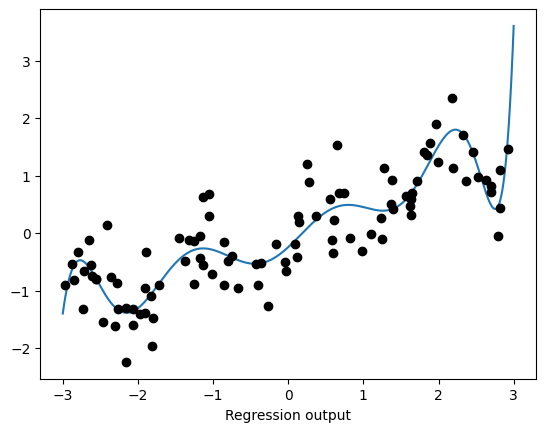

In [6]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=True).reshape(-1, 1)

poly = PolynomialFeatures(degree=10, include_bias=False)

poly.fit(X)
X_poly = poly.transform(X)

poly.fit(line)
line_poly = poly.transform(line)

print("X :\n{}".format(X[:5]))
print("X_poly: \n{}".format(X_poly[:5]))
print("Features:\n{}".format(poly.get_feature_names()))

reg = LinearRegression().fit(X_poly, y)
plt.plot(line, reg.predict(line_poly), label='Linear Regression polynomial')

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Regression output")
plt.ylable("Input")
plt.legend(loc='best')

In [13]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#till now we have scaled our dataset, and now lets add some interactions and polynomial features

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Scaled X_train shape without interactions:{}\nScaled X_train shape with interactions:{}\n"
      .format(X_train_scaled.shape, X_train_poly.shape))
#the features without interactions is 13, with interactions all possible combination of 2 are 
# considered and features increases to 105

print("Features:{}\n".format(poly.get_feature_names()))
#here first feature is 1 means constant

#testing score in linear models
ridge = Ridge().fit(X_train_scaled, y_train)
print("Ridge score without interactions:{}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Ridge score with interactions:{}\n".format(ridge.score(X_test_poly, y_test)))

#testing score in random forest
reg = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Regressor score without interactions:{}".format(reg.score(X_test_scaled, y_test)))

reg = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Regressor score with interactions:{}".format(reg.score(X_test_poly, y_test)))
#Here the sa

C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

Scaled X_train shape without interactions:(379, 13)
Scaled X_train shape with interactions:(379, 105)

Features:['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x1